In [1]:
# import modules
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
import pandas as pd
import math
%matplotlib inline

In [2]:
# Read Text File in Python
#5050 weighting
#File 1 - accepted samples 
Filename1 = "Accepted_Final_SM_test1.csv"  #"RPM_dakota_w.dat"
DF1 = pd.read_csv(Filename1,sep = ",",engine='python')
DF1.head()

,Unnamed: 0,mcmc_id,interface,FR,K,Y,rmse,CRNrmse,Reject,Like
0,0,1,NO_ID,2.000000,-4.000000,-1.400000,0.780884,3530.62,False,-6.57974
1,1,3,NO_ID,1.641706,-3.478398,-1.588790,1.831960,1549.09,False,-6.41606
2,2,4,NO_ID,1.855062,-3.408226,-1.382437,0.839622,2299.01,False,-4.35371
3,3,6,NO_ID,1.198227,-4.001504,-1.469654,1.612860,2213.28,False,-6.37413
4,4,11,NO_ID,2.867350,-2.658376,-1.472506,1.359620,1714.91,False,-4.88589


In [5]:
# Read Text File in Python
#5050 weighting
#File 2 - all samples 
Filename2 = "RPM_dakota_SM.dat"  #"RPM_dakota_w.dat"
DF2 = pd.read_csv(Filename2,sep = "\s+|\t+|\s+\t+|\t+\s+",engine='python')
DF2.head()

,eval_id,interface,FR,K,Y,rmse,CRNrmse
0,1,NO_ID,2.000000,-4.000000,-1.400000,0.780884,3530.62
1,2,NO_ID,2.291669,-4.092051,-1.310707,2.302080,4090.42
2,3,NO_ID,1.641706,-3.478398,-1.588790,1.831960,1549.09
3,4,NO_ID,1.855062,-3.408226,-1.382437,0.839622,2299.01
4,5,NO_ID,2.704961,-4.208779,-1.410758,2.645360,3908.52


In [8]:
# mask RMSE values > 10^10 / 1 in this case (< 10.**10.)
DFm = DF2.where(DF2.rmse < 99999)
DFm.head()

,eval_id,interface,FR,K,Y,rmse,CRNrmse
0,1.0,NO_ID,2.000000,-4.000000,-1.400000,0.780884,3530.62
1,2.0,NO_ID,2.291669,-4.092051,-1.310707,2.302080,4090.42
2,3.0,NO_ID,1.641706,-3.478398,-1.588790,1.831960,1549.09
3,4.0,NO_ID,1.855062,-3.408226,-1.382437,0.839622,2299.01
4,5.0,NO_ID,2.704961,-4.208779,-1.410758,2.645360,3908.52


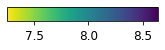

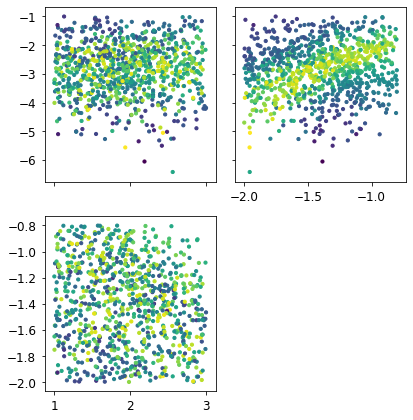

<Figure size 432x288 with 0 Axes>

In [12]:
###################
#set up figure
fig5 = plt.figure(5)
plt.figure(figsize=(6,6))

# Customise figure style #
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('font',size=12)
rc('ytick.major',pad=5)
rc('xtick.major',pad=5)
padding = 5

#colourmap 
plt.set_cmap('viridis_r')

#set up axis 3x3 scatter plot
ax1 = plt.subplot(221) 
ax2 = plt.subplot(222, sharey=ax1)
ax3 = plt.subplot(223, sharex=ax1)
######################

#set colour of scatter 
#scatterCRN = np.log(DFm.CRNrmse)
#scatterTopo = np.log(DFm.rmse)
#scatterLike = np.log((DF1.Like)*-1)

######################
#plot scatter points
#ax1 plot = K & FR
#ax1.plot(DF.FR,DF.K,'.',color=[0.8,0.8,0.8])
#plot all samples 
points = ax1.scatter(DFm.FR,DFm.K,c=np.log(DFm.CRNrmse),s=10,zorder=10, alpha=1) 
#plot accepted samples
#points = ax1.scatter(DF1.FR,DF1.K,c=np.log((DF1.Like)*-1),s=15,zorder=10, alpha=1.) 
plt.setp(ax1.get_xticklabels(), visible=False)

#ax1.set_ylabel('K')
#ax1.set_xlabel('FR')
######################

######################
#ax2 plot = K & Y
#ax2.plot(DF.Y,DF.K,'.',color=[0.8,0.8,0.8])
#plot all samples
points = ax2.scatter(DFm.Y,DFm.K,c=np.log(DFm.CRNrmse),s=10,zorder=10, alpha=1)
#plot accepted samples
#points = ax2.scatter(DF1.Y,DF1.K,c=np.log((DF1.Like)*-1),s=15,zorder=10, alpha=1.)
plt.setp(ax2.get_yticklabels(), visible=False)

#ax2.set_ylabel('K')
#ax2.set_xlabel('Y')
######################

######################
#ax3 plot = Y & FR
#ax3.plot(DF.FR,DF.Y,'.',color=[0.8,0.8,0.8])
#plot all samples
points = ax3.scatter(DFm.FR,DFm.Y,c=np.log(DFm.CRNrmse),s=10,zorder=10, alpha=1)#, alpha=0.2) #, cmap='viridis') c=np.log(DFm.rmse)
#plot accepted samples
#points = ax3.scatter(DF1.FR,DF1.Y,c=np.log((DF1.Like)*-1),s=15,zorder=10, alpha=1.)

#ax3.set_ylabel('Y')
#ax3.set_xlabel('FR')
#####################

#####################
#ax1.legend(loc='upper left')
#add colourbar
fig5.colorbar(points, cax=fig5.add_axes([0.5,0.2,0.35,0.05]),orientation="horizontal")

#plot and save fig 
fig5 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
#fig5.savefig('SM_CRN_scatter.png',dpi=300)
#fig5.savefig('CB_topo_scatter.svg',dpi=300)
######################
